# Web Scraping

Web Scraping is a technique that consists of extracting information from web pages. In this case I extracted information from the 20 featured pages of an Amazon product, information such as price,title, and additional features, and all this will be placed in a dataframe.


# Basic notions


The HTML5 standar includes HTML, CSS and JavaScript, but for web scraping I only used part of HTML programation, essentially the use of tags.

**Locating elements**

There are various strategies to locate elements in a page. You can use the most appropriate one for your case. Selenium provides the following methods to locate elements in a page:


* find_element_by_id
* find_element_by_name
* find_element_by_xpath
* find_element_by_link_text
* find_element_by_partial_link_text
* find_element_by_tag_name
* find_element_by_class_name
* find_element_by_css_selector

**Find elements by ID**


For example, to find out the searth bar ID on Amazon web, go to amazon web, then right click on search bar and inspect.

In the red box image you'll see id="twotabsearchtextbox", and the method using the code above is:

**find_element_by_id("twotabsearchtextbox")** or

**find_element(By.ID,"twotabsearchtextbox")** 


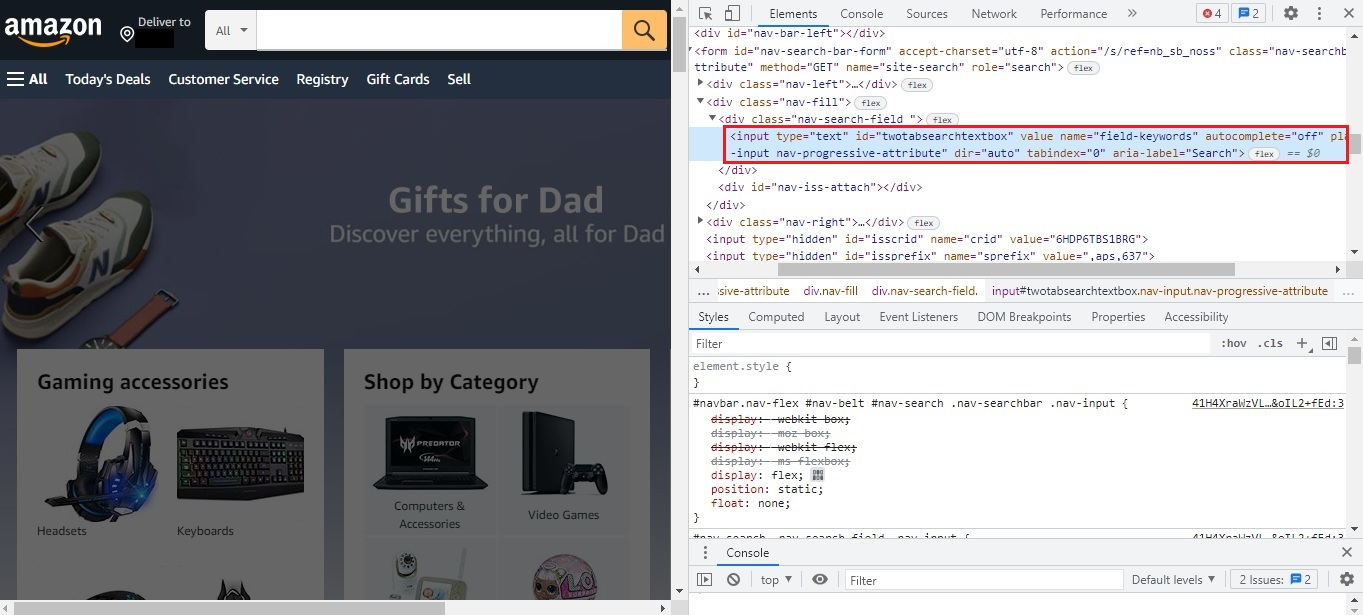

**Find elements by XPATH**

XPath is the language used for locating nodes in an XML document.
One of the main reasons for using XPath is when you don’t have a suitable id or name attribute for the element you wish to locate. You can use XPath to either locate the element in absolute terms (not advised), or relative to an element that does have an id or name attribute. 

To find the XPath just right click on the HTML code and copy the XPath,and the method using the locations elements is:

**find_element_by_xpath(//*[@id="twotabsearchtextbox"])** or

**find_element(By.XPATH,//*[@id="twotabsearchtextbox"])**

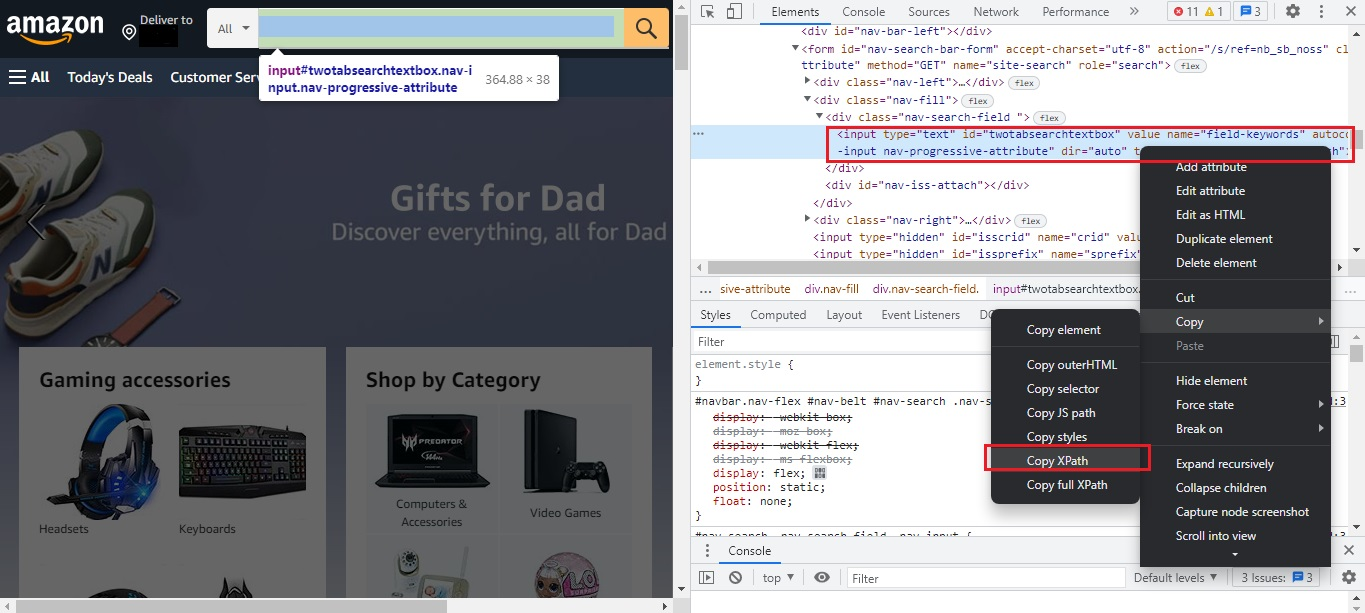

Reference: https://selenium-python.readthedocs.io/locating-elements.html

# 1. Starting

To begin first import the selenium and chrome driver libraries and create the driver object.

**1.1. Import selenium library and chrome driver**

In [1]:
!pip install selenium                                 # Install selenium
!apt-get update                                       # To update ubuntu to correctly run apt install
!apt install chromium-chromedriver -y                 # Install chrome driver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin   # Adding the driver path 

import sys                                                    
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 979 kB 700 kB/s 
     |████████████████████████████████| 359 kB 47.2 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
Get:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [5391 B]
Get:2 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease [6786 B]
Get:3 http://packages.cloud.google.com/apt cloud-sdk InRelease [6751 B]
Get:4 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1581 B]
Ign:5 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://packages.cloud.google.com/apt gcsfuse-bionic/main amd64 Packages [1080 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://packages.cloud.google.com/apt cloud-sdk-bionic/main amd64 Packages

**1.2. Create a driver with options**


In [2]:
from selenium import webdriver                                  # Import webdriver

chrome_options = webdriver.ChromeOptions()                      # Create object ChromeOptions()
chrome_options.add_argument('--headless')           
chrome_options.add_argument('--no-sandbox')                             
chrome_options.add_argument('--disable-dev-shm-usage')
driver= webdriver.Chrome('chromedriver',options=chrome_options) # Create driver

In Spyder IDE this first part is:

> !pip install selenium

> from selenium import webdriver

> from selenium.webdriver.chrome.options import Options

> from selenium.webdriver.chrome.service import Service

> chrome_options = Options()

> chrome_options.add_experimental_option("detach", True)

> driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=chrome_options)
    
Then the rest of the below code is the same

# 2. Initializing search

In this part enter the URL, create the explicit waits, that is a better tool than the time.sleep(seconds), and enter the product.

**2.1. Enter the URL**








In [3]:
url="http://amazon.com"        # Page URL
driver.get(url)                # Go to that URL

**2.2. Create Explicit Waits to locate the search bar**

An explicit wait is a code you define to wait for a certain condition to occur before proceeding further in the code. The extreme case of this is time.sleep(), which sets the condition to an exact time period to wait.

Reference: https://selenium-python.readthedocs.io/waits.html

* The first condition is "presence_of_element_located" that checks that element is on the page source. 

* The page sometimes gives you two IDs, that's why I decided to try with two ID's: **'twotabsearchtextbox'**, **'nav-bb-search'**

* This ExplicitWait waits by 3 seconds, in this case, to find that element by ID before the TimeException occurs, and if this is executed just refresh the page until the condition is fulfilled




In [4]:
#These 3 methods are for ExplicitWaits
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#Exception library
from selenium.common.exceptions import TimeoutException

while(True):
    try: 
        search=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.ID, "twotabsearchtextbox")))
    except TimeoutException:
        try:
            search=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.ID, "nav-bb-search")))
        except TimeoutException:       #Exception when the ExplicitWait condition occurs
            driver.refresh()
            continue
        else:
            break
    else:
        break

**2.3. Enter the product**

This code below makes: first type the product in the search bar and press ENTER


In [5]:
from selenium.webdriver.common.keys import Keys       #Import the Keys object

articlename="keyboard"                    
search.send_keys(articlename,Keys.ENTER)  

> Now we are on the main page of the product 

# 3. Number of pages


**3.1. Finding the number of pages**

* To find the number of pages I used a ExplicitWait with the condition "presence_of_element_located" by XPATH
* The method 'WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,"..."))).**text**' gets the text included inside the HTML code
* If the exception occurs a message will be printed and the page will be refresed


In [6]:
while(True):
    try: 
        numberofpages=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH, "//*[@class='s-pagination-item s-pagination-disabled']"))).text
    except TimeoutException: 
        print("The total number of pages was not found.")
        driver.refresh()
        continue
    else:
        break
print("Total number of pages: ",numberofpages)

Total number of pages:  20


> Continue at point **4. Data Article**

# Functions

# 5. Number of articles

This is going to be a **function**, since each page has a different number of products or articles. 

* To find the number of articles I used a ExplicitWait with the condition "presence_of_all_elements_located" by XPATH
* To find out the products path, that contains several tags, I used two tags "@data-cel-widget","@data-asin" and their start values "search_result_", "B0" respectively as a filter. 
* If the exception occurs a message will be printed and the page will be refresed.

#Second part

* "**elements**" is going to give me all the products XPATH on the page even the advertising products and others, so to avoid the latter I'm going to count all the products that have the tag @class='a-size-medium a-color-base a-text-normal' .


In [7]:
def NumberofArticles():    
    while(True):
        try: 
            elements=WebDriverWait(driver,5).until(EC.presence_of_all_elements_located((By.XPATH,'//*[contains(@data-cel-widget,"search_result_") and contains(@data-asin,"B0")]')))
        except TimeoutException: 
            print("No elements found")
            driver.refresh()
            continue
        else:
            break      
    print("Items found with the filter: ",len(elements))
    # Second part
    numberofarticles=0        
    for i in elements:
        try:
            i.find_element(By.XPATH,".//span[@class = 'a-size-medium a-color-base a-text-normal']").text
        except:
            continue
        else:
            numberofarticles+=1
    print("Total number of articles: ",numberofarticles)
    print("***************************************************************")
    return numberofarticles


# 6. Article title

* To find the article title I used a ExplicitWait with the condition "presence_of_element_located" by XPATH.
* If exists return the article title, if not '', and append it to TitleList


In [8]:
def Title():
    try: 
        title=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH, '//*[@id="productTitle"]'))).text
    except TimeoutException: 
        return ''
    else:
        return title

# 7. Article price

* To find the article price I used a ExplicitWait with the condition "presence_of_element_located" by XPATH. There are two XPATHS where article prices appear
* If exists return the article price, if not '', and append it to PriceList

In [9]:
def Price():
    try: 
        price=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH, '//*[@id="corePrice_desktop"]/div/table/tbody/tr/td[2]/span[1]/span[2]'))).text
    except TimeoutException: 
        try: 
            price=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH, '//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span/span[2]/span[2]'))).text
        except TimeoutException: 
            return ''
        else:
            return price
    else:
        return price

# 8. Table1 Information

At point **4. Data Article** I explaind what is the information in the table.

* To find out if the article has a expander prompt I used a ExplicitWait with the condition "presence_of_element_located" by XPATH. If exists click on it and if not return nothing.
* Then to find the length of that table I used a find_elements by XPATH, with the length I returned the features and values of the table.

In [10]:
def Table1():
    FeatureTable1List=[]
    ValueTable1List=[]
    print("***************************************************************")
    try:
        WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//*[@id="productOverview_feature_div"]')))
    except TimeoutException:
        print("Table1: Primary path not found")
        return [],[]       
    else:
        #Second part
        try:
            WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//*[@id="poExpander"]/div[1]/div/table/tbody')))
        except TimeoutException:
            table1rows=len(driver.find_elements(By.XPATH,'//*[@id="productOverview_feature_div"]/div/table/tbody/tr'))
            print("Table1rows with the first Path: ",table1rows)    
            for i in range(table1rows):
                FeatureTable1List.append(driver.find_element(By.XPATH,'//*[@id="productOverview_feature_div"]/div/table/tbody/tr['+str(i+1)+']/td[1]').text)
                ValueTable1List.append(driver.find_element(By.XPATH,'//*[@id="productOverview_feature_div"]/div/table/tbody/tr['+str(i+1)+']/td[2]').text)
            return FeatureTable1List,ValueTable1List       
        else:
            #Click on See more
            WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,'//*[@id="poToggleButton"]/a/span'))).click()
            table1rows=len(driver.find_elements(By.XPATH,'//*[@id="poExpander"]/div[1]/div/table/tbody/tr'))
            print("Table1rows with the second Path: ",table1rows)    
            for i in range(table1rows):
                FeatureTable1List.append(driver.find_element(By.XPATH,'//*[@id="poExpander"]/div[1]/div/table/tbody/tr['+str(i+1)+']/td[1]').text)
                ValueTable1List.append(driver.find_element(By.XPATH,'//*[@id="poExpander"]/div[1]/div/table/tbody/tr['+str(i+1)+']/td[2]').text)                
            return FeatureTable1List,ValueTable1List 

# 9. Table2 Information

The code is similar to the second part of the point **8. Table1 information**, but this is anohter table located below of the first table


In [11]:
def Table2():
    FeatureTable2List=[]
    ValueTable2List=[]
    try:
        WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//*[@id="productDetails_techSpec_section_1"]/tbody/tr')))
    except TimeoutException:
        print("\nTable2: Primary path not found")
        return [],[]
    else:
        table2rows=len(driver.find_elements(By.XPATH,'//*[@id="productDetails_techSpec_section_1"]/tbody/tr'))
        print("\nTable2rows: ",table2rows)
        for i in range(table2rows):
            FeatureTable2List.append(driver.find_element(By.XPATH,'//*[@id="productDetails_techSpec_section_1"]/tbody/tr['+str(i+1)+']/th').text)
            ValueTable2List.append(driver.find_element(By.XPATH,'//*[@id="productDetails_techSpec_section_1"]/tbody/tr['+str(i+1)+']/td').text)
        return FeatureTable2List,ValueTable2List

# 10. Table3 Information

The code is similar to the second part of the point **8. Table1 information**, but this is anohter table located by the second table


In [12]:
def Table3():
    FeatureTable3List=[]
    ValueTable3List=[]
    try:
        WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//*[@id="productDetails_detailBullets_sections1"]/tbody/tr')))
    except TimeoutException:
         print("\nTable3: Primary path not found")
         return [],[]
    else:
        table3rows=len(driver.find_elements(By.XPATH,'//*[@id="productDetails_detailBullets_sections1"]/tbody/tr'))
        print("\nTable3rows: ",table3rows)
        for i in range(table3rows):
            FeatureTable3List.append(driver.find_element(By.XPATH,'//*[@id="productDetails_detailBullets_sections1"]/tbody/tr['+str(i+1)+']/th').text)
            ValueTable3List.append(driver.find_element(By.XPATH,'//*[@id="productDetails_detailBullets_sections1"]/tbody/tr['+str(i+1)+']/td').text)
        return FeatureTable3List,ValueTable3List

# 4. Data Article

In this part information will be extracted such as title, price and table information from three tables that are on the page of an article. The picture below is the first Table, and sometimes there is a expander prompt, and it's necessary to click on that expander to reveal the information. 

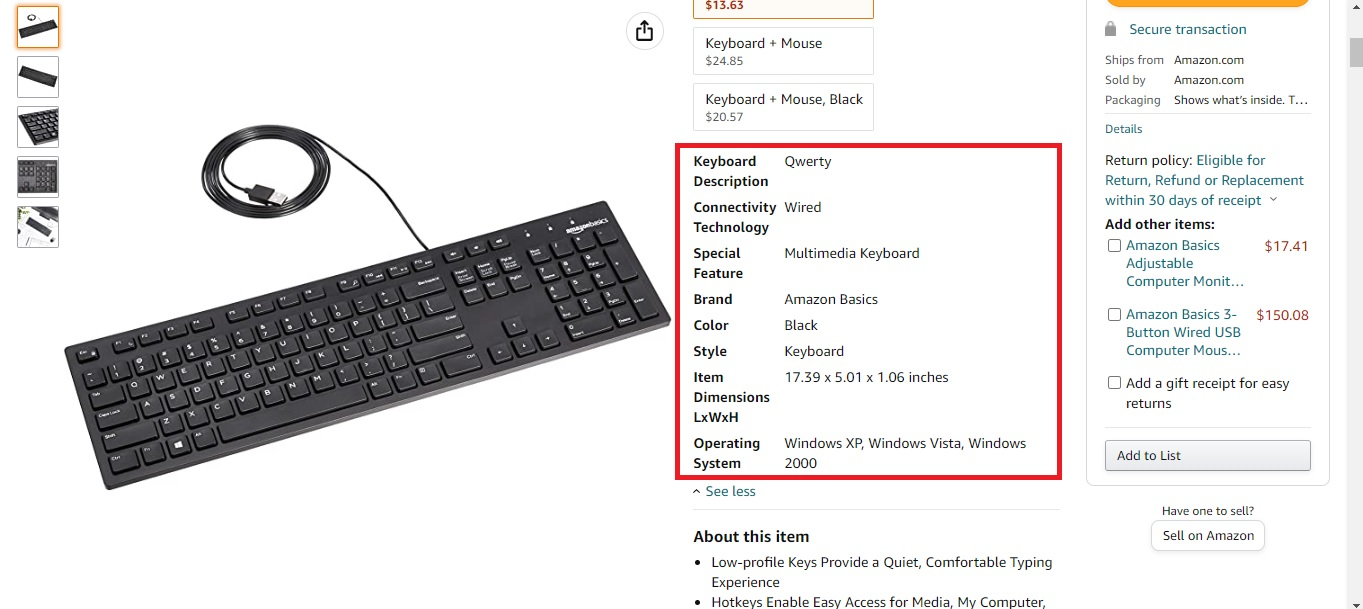

About the code below

* In the first **for** loop, set the number of pages, and skip the first page since we are on the first page.
* Then I got the number of articles with the function "**NumberofArticles()**". See point **5. Number or articles**

#Second part

* The **while** loop will move through all products on a specific page
* All the products on a specific page start with a XPATH: //[@id="search"]/div[1]/div[1]/div/span[3]/div[2]/div[2+i], also there are two XPATHS that the products have.
* Then I got the article title with the function "**Title()**". See point **6. Article title**
* Then I got the article price with the function "**Price()**". See point **7. Article price**
* Then I got the Table1 information with the function "**Table1()**". See point **8. Table1 information**, and so on with the Table2 and Table3

#Third part

* The information of the tables are integrated in one variable for both values[**ValueTableList**] and features[**FeatureTableList**]

#Fourth part

* The information of the tables about one product is append to **FeaturesList**, **ValuesList**
* driver.back() return to the previous page
* driver.quit() shut down the web driver object



In [13]:
#List of product titles and prices 
TitleList=[]
PriceList=[]
#List of product table features
FeaturesList=[]
ValuesList=[] 
#Total number of articles
TotalNumberofArticles=0 
for j in range(int(numberofpages)):
    if j>0:
        driver.get(url+'/s?k='+articlename+'&page='+str(j+1))
    #Go to point 5. Number or articles 
    numberofarticles=NumberofArticles()
    print("Number of articles on page: ",j+1,"is equal to: ",numberofarticles)
    counter=0                                    #article number counter
    i=0                                          #iterator to increment XPATH
    TotalNumberofArticles+=numberofarticles
    #Second part
    while (counter<numberofarticles):
        try:         
            WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="search"]/div[1]/div[1]/div/span[3]/div[2]/div['+str(2+i)+']/div/div/div/div/div/div/div/div[2]/div/div/div[1]/h2/a/span'))).click()
        except TimeoutException:
            try:                            
                WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="search"]/div[1]/div[1]/div/span[3]/div[2]/div['+str(2+i)+']/div/div/div/div/div/div[2]/div/div/div[1]/h2/a/span'))).click()                
            except TimeoutException:  
                i+=1                        
                continue                    
        #********** Get article titles **********#Go to point 6. Article title
        TitleList.append(Title())
        #********** Get article prices **********#Go to point 7. Article price
        PriceList.append(Price())
        #******** Get Table1 information ********#Go to point  8. Table1 Information
        FeatureTable1List,ValueTable1List=Table1()
        #******** Get Table2 information ********#Go to point  9. Table2 Information
        FeatureTable2List,ValueTable2List=Table2()
        #******** Get Table3 information ********#Go to point  10. Table3 Information
        FeatureTable3List,ValueTable3List=Table3()
        #Third part
        #**************************  Get Table information ************************#
        FeatureTableList=FeatureTable1List+FeatureTable2List+FeatureTable3List
        ValueTableList=ValueTable1List+ValueTable2List+ValueTable3List
        #**************************************************************************#
        i+=1                                
        counter+=1                          
        print("***************************************************************")
        print("Article #",counter,"Page #",j+1) 
        print("Feature length of tables: ",len(FeatureTableList)) 
        print("Value length of tables: ",len(ValueTableList))
        #Fourth Part
        FeaturesList.append(FeatureTableList)
        ValuesList.append(ValueTableList)
        driver.back()                          #return to the previous page
driver.quit()                                  #shut down the web driver object

Items found with the filter:  35
Total number of articles:  22
***************************************************************
Number of articles on page:  1 is equal to:  22
***************************************************************
Table1rows with the second Path:  8

Table2rows:  11

Table3rows:  2
***************************************************************
Article # 1 Page # 1
Feature length of tables:  21
Value length of tables:  21
***************************************************************
Table1rows with the first Path:  4

Table2rows:  14

Table3rows:  2
***************************************************************
Article # 2 Page # 1
Feature length of tables:  20
Value length of tables:  20
***************************************************************
Table1rows with the second Path:  8

Table2rows:  11

Table3rows:  2
***************************************************************
Article # 3 Page # 1
Feature length of tables:  21
Value length of tables:  2

# 11. Get DataFrame

Now we have information about the price and title of the products,but I need to generate a union of the features, that's why I created a FeatureSet=set() with all the features of all the products.

Then I started filling the lists, if a product possessed that feature it was placed, if it was not placed blank.

In [14]:
import pandas as pd

DataArticle={}
DataArticle['Price']=PriceList
DataArticle['Title']=TitleList
FeaturesSet=set()
for l in range(TotalNumberofArticles):
    FeaturesSet=FeaturesSet | set(FeaturesList[l])
for m in FeaturesSet:
    List=[]
    for n in range(TotalNumberofArticles):
        if(m in set(FeaturesList[n])):
            Index=FeaturesList[n].index(m)
            List.append(ValuesList[n][Index])
        else:
            List.append('')
    DataArticle[m]=List
#Data frame building
columnsDF=['Title','Price']
for i in FeaturesSet:
    columnsDF.append(i)
df=pd.DataFrame(DataArticle,columns=columnsDF)
print("***************************************************************")
df
df.to_csv('ArticleData.csv')

***************************************************************


# References
1. https://selenium-python.readthedocs.io/